In [1]:
from PIL import Image, ImageFilter
import os

In [2]:
def convert_to_jpg(path):
    photos = os.listdir(path)
    os.mkdir(f'{path}/jpg/')
    for photo_1 in photos:
        photo = photo_1.split('.')[0]    
        image = Image.open(f'{path}/{photo_1}')
        image.save(f'{path}/jpg/{photo}.jpg')

# convert_to_jpg('C:/Users/Islam/Desktop/on_person')

In [3]:
def erode(iteration_num, image):
    for _ in range(iteration_num):
         image = image.filter(ImageFilter.MinFilter(3))
    return image

def preprocess(cloth, cloth_mask):
    # make cloth and the cloth_mask the same size
    cloth_mask = cloth_mask.resize((cloth.size))
    
    # using minfilter and iteration
    new_cloth_mask = erode(4, cloth_mask)
    
    # convert photo to grayscale image
    new_cloth_mask = new_cloth_mask.convert('L')
    
    # slightly blur the image
    new_cloth_mask = new_cloth_mask.filter(ImageFilter.BoxBlur(2))
    
    # create an empty blue image with the same size
    blank = Image.new(mode='RGB', size = cloth.size, color=(0, 0, 255))
    
    # composite all of this stuff
    blue_background_cloth = Image.composite(cloth, blank, new_cloth_mask)
    
    return blue_background_cloth

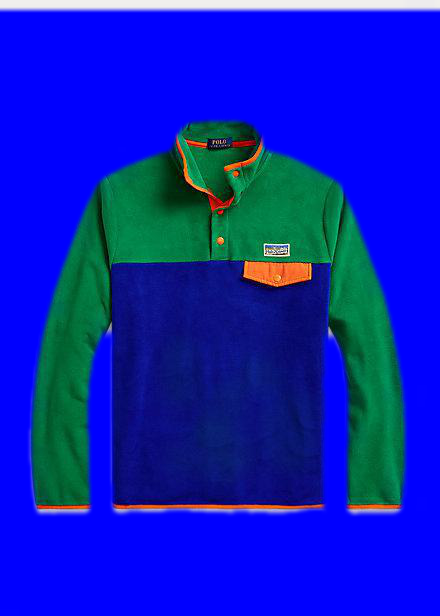

In [4]:
cloth = Image.open(r'C:\Users\Islam\Desktop\without_person\jpg\3.jpg')
cloth_mask_before = Image.open(r'C:/Users/Islam/Desktop/without_person/jpg/3_1.jpg')
# cloth_mask_before.crop((145, 30, 300, 250)).save('C:/Users/Islam/Desktop/without_person/jpg/3_1.jpg')
cloth_mask = Image.open(r'C:/Users/Islam/Desktop/without_person/jpg/3_1.jpg')
preprocess(cloth, cloth_mask)